### &emsp;&emsp; &emsp;EVENT EXTRACTION FROM CRIME NEWS ARTICLES



### 1. Getting data
We are getting the news articles from newsapi, which provides us with news articles headlines and a description of the article and many other stuff.

In [1]:
!pip install newsapi-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='895e7a492f9f475cbe93cb98222bdf50')

In [3]:
from datetime import datetime, timedelta
def get_past_articles(past = 30):
    past_articles = dict()
    for past_days in range(1,past):
        from_day = str(datetime.now() - timedelta(days = past_days))[:-16]
        to_day = str(datetime.now() - timedelta(days = past_days - 1))[:-16]
        past_articles.update({from_day:to_day})
    return past_articles

In [4]:
from tqdm import tqdm
def get_articles(query, past = 30):
    past_articles = get_past_articles(past)
    all_articles = []
    for i,j in tqdm(past_articles.items()):
        for pag in tqdm(range(1,6)):
            pag_articles = newsapi.get_everything(q=query,language='en',from_param=i,to=j,sort_by='relevancy',page=pag)['articles']
            if len(pag_articles) == 0: break
            all_articles.extend(pag_articles)
    return all_articles

***we are getting all the news articles related to crime from past 15 days.***

In [13]:
articles = get_articles('crime',15)

100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  2.29it/s]


100%|███████████████████████████████████████████| 14/14 [00:38<00:00,  2.73s/it]


In [21]:
print("total number of articles in the data : ",len(articles))

total number of articles in the data :  7000


In [16]:
articles[0]

{'source': {'id': 'business-insider', 'name': 'Business Insider'},
 'author': 'abitter@businessinsider.com (Alex Bitter)',
 'title': "Store closures are hitting Downtown San Francisco as office vacancies and fears of crime are on the rise. Here's the full list of retailers pulling out of the city's downtown neighborhood.",
 'description': 'Retailers from Anthropologie to Office Depot are leaving downtown San Francisco as reports of crime, drug use, and other dangers cause safety concerns.',
 'url': 'https://www.businessinsider.com/san-franciscos-union-square-store-closures-since-2020-2023-5',
 'urlToImage': 'https://i.insider.com/6453cf4fdcb78700180ce0c8?width=1200&format=jpeg',
 'publishedAt': '2023-05-05T09:00:00Z',
 'content': "Whole Foods' decision to close its flagship store in downtown San Francisco made national news, but it is far from the only retailer to pull out of the area recently.\r\nThe shopping district around Un… [+6561 chars]"}

In [255]:
titles = [article['title'] for article in articles]
dates = [article['publishedAt'] for article in articles]
descriptions = [article['description'] for article in articles]
authors = [article['author'] for article in articles]

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({'title' : titles, 'date' : dates, 'desc' : descriptions , 'author' : authors})
df = df.drop_duplicates(subset='title').reset_index(drop=True)
df = df.dropna()

df.head()

,title,date,desc,author
0,Store closures are hitting Downtown San Francisco as office vacancies and fears of crime are on the rise. Here's the full list of retailers pulling out of the city's downtown neighborhood.,2023-05-05T09:00:00Z,"Retailers from Anthropologie to Office Depot are leaving downtown San Francisco as reports of crime, drug use, and other dangers cause safety concerns.",abitter@businessinsider.com (Alex Bitter)
1,CPS officer from Wales jailed after leaking files to organised criminals,2023-05-05T16:35:26Z,Rachel Simpson from Newport accessed computer systems to obtain information about police drugs operationsA Crown Prosecution Service officer who leaked sensitive files about complex police investi...,Steven Morris
2,Dreda Say Mitchell: ‘I’m a massive historical romance fangirl’,2023-05-05T09:00:18Z,"The crime novelist on the allure of Poldark, the power of The Color Purple and joys of Jack ReacherMy earliest reading memoryI don’t have an individual book; what I have is a whole building. I gre...",Dreda Say Mitchell
3,‘The Truth Will Be Loud’: Thailand’s Former Brothel Baron Is Using His Infamy to Fight Crime,2023-05-05T05:25:50Z,"Bangkok's reformed ""super pimp"" is on a one-man crusade against gangsters, politicians, and police. And he's getting results.","Gavin Butler, Caleb Quinley, Alastair McCready"
4,"After Jordan Neely's death, homeless advocates blame NYC's 'dehumanizing' policies",2023-05-05T10:41:14Z,The 30-year-old homeless man died from a chokehold by another passenger on the NYC subway. Advocates say the city's policies and rhetoric concerning people who are homeless are dangerous and false.,Emma Bowman


In [257]:
print("number of entries in the dataframe : ",len(df))

number of entries in the dataframe :  3582


In [258]:
df.to_csv('newsapi_crime_data.csv')#saving the data to a csv file.

In [259]:
df = pd.read_csv('newsapi_crime_data.csv',lineterminator='\n')

In [260]:
df.iloc[0]['title']

"Store closures are hitting Downtown San Francisco as office vacancies and fears of crime are on the rise. Here's the full list of retailers pulling out of the city's downtown neighborhood."

### 2. Preprocess Data
we will preprocess the news article headlines. 
- We will remove if there are any http links.
- we will tokenize and store in tokens if the word is not a stopword or a punctuation mark
- we will lemmatize

In [269]:
import re
def preprocess(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    # lemmatize tokens
    lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    processed_text = ' '.join(lemmas)
    
    return processed_text

In [271]:
df['pre_text'] = df['title'].apply(preprocess)

In [272]:
df

,Unnamed: 0,title,date,desc,author,pre_text
0,0,Store closures are hitting Downtown San Francisco as office vacancies and fears of crime are on the rise. Here's the full list of retailers pulling out of the city's downtown neighborhood.,2023-05-05T09:00:00Z,"Retailers from Anthropologie to Office Depot are leaving downtown San Francisco as reports of crime, drug use, and other dangers cause safety concerns.",abitter@businessinsider.com (Alex Bitter),store closure hit downtown san francisco office vacancy fear crime rise here list retailer pull city downtown neighborhood
1,1,CPS officer from Wales jailed after leaking files to organised criminals,2023-05-05T16:35:26Z,Rachel Simpson from Newport accessed computer systems to obtain information about police drugs operationsA Crown Prosecution Service officer who leaked sensitive files about complex police investi...,Steven Morris,cps officer wale jail leak file organised criminal
2,2,Dreda Say Mitchell: ‘I’m a massive historical romance fangirl’,2023-05-05T09:00:18Z,"The crime novelist on the allure of Poldark, the power of The Color Purple and joys of Jack ReacherMy earliest reading memoryI don’t have an individual book; what I have is a whole building. I gre...",Dreda Say Mitchell,dreda mitchell m massive historical romance fangirl
3,3,‘The Truth Will Be Loud’: Thailand’s Former Brothel Baron Is Using His Infamy to Fight Crime,2023-05-05T05:25:50Z,"Bangkok's reformed ""super pimp"" is on a one-man crusade against gangsters, politicians, and police. And he's getting results.","Gavin Butler, Caleb Quinley, Alastair McCready",truth loud thailand brothel baron infamy fight crime
4,4,"After Jordan Neely's death, homeless advocates blame NYC's 'dehumanizing' policies",2023-05-05T10:41:14Z,The 30-year-old homeless man died from a chokehold by another passenger on the NYC subway. Advocates say the city's policies and rhetoric concerning people who are homeless are dangerous and false.,Emma Bowman,jordan neelys death homeless advocate blame nycs dehumanizing policy
...,...,...,...,...,...,...
3577,3872,‘Why I called 999 to tell police my teenage son had just murdered someone’,2023-04-22T18:27:32Z,"‘It absolutely broke my heart to make that call but I had no alternative,’ says Donna Delbono",Andy Gregory,call 999 tell police teenage son murder
3578,3873,Lifestyles of the rich and famous: How AFL players like Dustin Martin and Lance Franklin spend cash,2023-04-23T00:02:04Z,AFL players don't just wow fans on the field - some are now so good at their craft they are millionaires - here's how the league's seven most highly-paid players live out their glamorous lives.,Kristy Williams,lifestyle rich famous afl player like dustin martin lance franklin spend cash
3579,3874,Seattle Apple Store robbed of 436 iPhones after thieves dig tunnel through bathroom,2023-04-22T05:49:02Z,"Thieves stole 436 iPhones, valued at $500k, from an Apple store in Seattle, by cutting a hole from the coffee shop next door. The burglars dug through the bathroom wall of the coffee shop, Seattle...",The Feed,seattle apple store rob 436 iphone thief dig tunnel bathroom
3580,3875,DoorDash driver kidnapped and assaulted by man while attempting delivery at a hotel,2023-04-22T20:38:35Z,A man accused of kidnapping and sexually battering a DoorDash driver while the woman attempted to make a delivery at a Residence Inn hotel has been arrested.,Minyvonne Burke and Alex Lo,doordash driver kidnap assault man attempt delivery hotel


### 3. Word embeddings
We are using a pretrained model in spacy `en_core_web_lg` for getting word embeddings(300-D array)

In [273]:
import nltk
import spacy

nlp = spacy.load('en_core_web_lg')

In [274]:
sent_vecs = {}
docs = []

In [275]:
for title in tqdm(df.pre_text):
    doc = nlp(title)
    docs.append(doc)
    sent_vecs.update({title : doc.vector})

100%|██████████████████████████████████████| 3582/3582 [00:18<00:00, 194.22it/s]


In [276]:
sentences = list(sent_vecs.keys())
vectors = list(sent_vecs.values())

In [277]:
print('no of sentences : ',len(sentences))
print(sentences[0])

no of sentences :  3537
store closure hit downtown san francisco office vacancy fear crime rise here list retailer pull city downtown neighborhood


In [278]:
#each title will have a respective 300th-dimensional array 
vectors[0]

array([-6.9442201e-01,  2.7293783e-01, -2.7519498e+00,  8.9526379e-01,
        1.1731000e+00,  1.1724467e+00,  2.1478889e+00,  3.9187884e+00,
       -2.1835834e-01,  1.6414593e+00,  2.6678488e+00, -2.7456038e-02,
       -3.2223520e+00,  3.1979687e+00, -1.4114372e+00,  8.5382205e-01,
        9.6418548e-01, -2.7913058e-01, -2.9869497e-01, -1.7124213e+00,
        1.1229932e+00,  5.6384081e-01, -7.2294664e-01, -1.3139828e+00,
       -9.8477203e-01, -4.5518827e-01, -2.4344146e+00, -3.1432073e+00,
       -4.2727266e-02,  6.1512902e-02,  1.1180079e+00,  2.0796545e+00,
       -1.0282938e+00, -1.8180594e+00, -4.7959473e-02, -1.4632775e-03,
       -1.7783031e+00,  1.7945112e+00,  1.3281800e+00,  7.6581377e-01,
       -7.5327897e-01, -2.9951662e-01,  1.4525528e+00,  6.3359857e-01,
       -1.0321095e+00,  1.4662386e-01, -7.0439231e-01, -2.0181017e+00,
        9.0080875e-01,  2.1162236e+00,  5.1210269e-02,  2.8203946e-01,
        9.1822736e-02, -9.8209274e-01, -1.7048783e+00,  3.1363353e-02,
      

### 4. Clustering using DBSCAN
To group articles from different topics, we are using a clustering algorithm.
We are using DBSCAN algorithm for performing the clustering

In [279]:
from sklearn.cluster import DBSCAN
x = np.array(vectors)
n_classes = {}

for i in tqdm(np.arange(0.001,1,0.002)):
    dbscan = DBSCAN(eps = i, min_samples = 3, metric = 'cosine').fit(x)
    n_classes.update({i:len(pd.Series(dbscan.labels_).value_counts())})
    

100%|█████████████████████████████████████████| 500/500 [01:53<00:00,  4.42it/s]


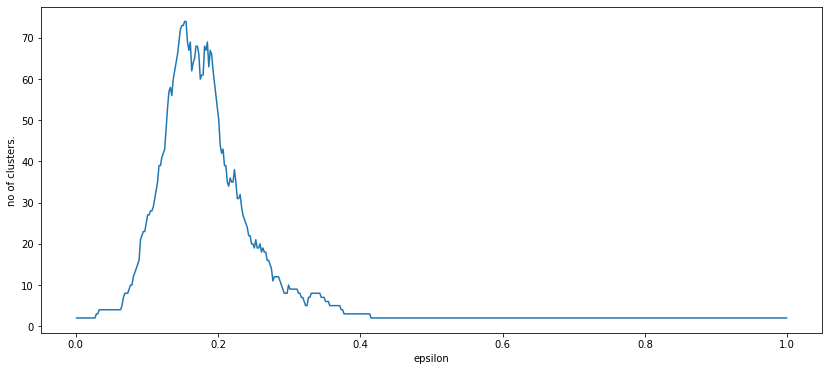

In [318]:
import matplotlib.pyplot as plt
x_values = n_classes.keys()
y_values = n_classes.values()

plt.figure(figsize = (14,6))
plt.plot(x_values, y_values)
plt.xlabel('epsilon')
plt.ylabel('no of clusters.')

plt.show()`

In [334]:
n_classes

{0.001: 2,
 0.003: 2,
 0.005: 2,
 0.007: 2,
 0.009000000000000001: 2,
 0.011: 2,
 0.013000000000000001: 2,
 0.015: 2,
 0.017: 2,
 0.019000000000000003: 2,
 0.021: 2,
 0.023: 2,
 0.025: 2,
 0.027000000000000003: 2,
 0.029: 3,
 0.031: 3,
 0.033: 4,
 0.035: 4,
 0.037000000000000005: 4,
 0.039: 4,
 0.041: 4,
 0.043000000000000003: 4,
 0.045: 4,
 0.047: 4,
 0.049: 4,
 0.051000000000000004: 4,
 0.053000000000000005: 4,
 0.055: 4,
 0.057: 4,
 0.059000000000000004: 4,
 0.061: 4,
 0.063: 4,
 0.065: 5,
 0.067: 7,
 0.069: 8,
 0.07100000000000001: 8,
 0.07300000000000001: 8,
 0.075: 9,
 0.077: 10,
 0.079: 10,
 0.081: 12,
 0.083: 13,
 0.085: 14,
 0.08700000000000001: 15,
 0.089: 16,
 0.091: 21,
 0.093: 22,
 0.095: 23,
 0.097: 23,
 0.099: 25,
 0.101: 27,
 0.10300000000000001: 27,
 0.10500000000000001: 28,
 0.107: 28,
 0.109: 29,
 0.111: 31,
 0.113: 33,
 0.115: 35,
 0.117: 39,
 0.11900000000000001: 39,
 0.121: 41,
 0.123: 42,
 0.125: 43,
 0.127: 48,
 0.129: 53,
 0.131: 57,
 0.133: 58,
 0.135: 56,
 0.

In [363]:
dbscan = DBSCAN(eps = 0.10, min_samples = 3, metric ='cosine').fit(x)

In [364]:
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - ( 1 if - 1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [365]:
n_clusters_

25

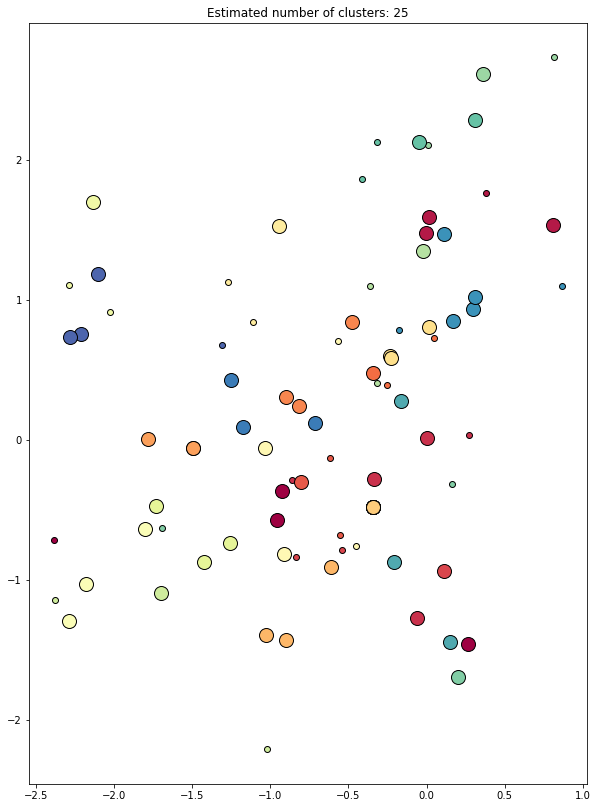

In [381]:
#plot all the clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        #col = [0, 0, 0, 1]
        continue

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [382]:
# number of elements for each and every cluster
cluster_freq = {}
for value in labels:
    if value in cluster_freq:
        cluster_freq[value]+= 1
    else:
        cluster_freq[value] = 1

In [383]:
cluster_freq #-1 is for those headlines which are not assigned to any cluster

{-1: 3447,
 0: 4,
 18: 3,
 1: 4,
 2: 5,
 17: 3,
 3: 3,
 4: 3,
 5: 3,
 6: 3,
 7: 3,
 11: 3,
 19: 3,
 8: 3,
 9: 8,
 12: 4,
 10: 3,
 13: 3,
 14: 3,
 15: 3,
 16: 3,
 20: 4,
 21: 3,
 22: 6,
 23: 3,
 24: 4}

In [377]:
results = pd.DataFrame({'label' : dbscan.labels_,'sent':sentences})
example_result = results[results.label == 1].sent.tolist()

In [378]:
event_df = df[df.pre_text.isin(example_result)][['date','title','author']]
event_df['date'] = pd.to_datetime(event_df.date)
event_df = event_df.sort_values(by='date').dropna()

In [379]:
pd.options.display.max_colwidth=200
len(event_df)

4

In [380]:
event_df

,date,title,author
650,2023-05-04 18:00:21+00:00,"Tyre Nichols died of blunt force injuries, autopsy shows",Adrian Sainz
731,2023-05-04 18:25:31+00:00,"Tyre Nichols died of blunt force injuries, autopsy finds",Adrian Sainz
471,2023-05-04 20:30:45+00:00,Tyre Nichols' autopsy reveals he died from blunt force trauma to the head,"Memphis Commercial Appeal, Lucas Finton and Gina Butkovich, Memphis Commercial Appeal"
169,2023-05-05 01:48:01+00:00,"Tyre Nichols died from blunt force trauma to the head from Memphis police beating, autopsy shows","Emma Tucker,Shawn Nottingham"
